<h1 style="font-family: TimesNewRoman;">Predicting Income Category Using KNN: Exploring Key Factors</h1>

<h2 style="font-family: TimesNewRoman;">Introduction:</h2>

<p style="font-family: TimesNewRoman;">


Income is essential for an individual’s financial well-being to meet basic requirements and to achieve one's objectives (Morgan & David, 1963). Income is affected by factors including gender, age, marital status, occupation, and type of employment (Bhaskar et al. 2019). Making wise decisions regarding your income, profession, and education requires an understanding of this connection (Spurk & Abele, 20011). Through this study, we hope to investigate factors affecting income and forecast income categories using K-Nearest Neighbors (KNN).


**Question we're asking:**

**What are the key factors that contribute to an individual's income category, explore the relationship between these factors and predict the income category based on the classification model?**
    
Our main objective is to identify critical factors influencing income levels and analyze how they connect to various income categories. We will predict income categories based on age, education, occupation, labour class, and marital status using the KNN classification approach. The low and high-income cutoffs are $50,000 and less, respectively.

To address our research question, we will use the "Adult" dataset from the UCI Machine Learning Repository, which comprises 48,000+ records with variables like age, education, employment, job class, marital status etc. Preprocessing includes data cleansing, conversion, and normalization before KNN classification. We seek to provide insights into the factors impacting income to improve financial well-being.



</p>

<h1 style="font-family: TimesNewRoman;">Preliminary exploratory data analysis:</h1>


<h2 style="font-family: TimesNewRoman;">Loading and cleaning the data:</h2>

In [ ]:
# Installing necessary packages for data analysis

install.packages("magrittr")
install.packages("janitor")
install.packages("rsample")
install.packages("tidyverse")
install.packages("tidymodels")
install.packages("kknn")
install.packages("rlang")
install.packages("gridExtra")


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘snakecase’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘warp’, ‘furrr’, ‘slider’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘textshaping’, ‘conflicted’, ‘jsonlite’, ‘ragg’, ‘stringr’


Warning message in install.packages("tidyverse"):
“installation of package ‘textshaping’ had non-zero exit status”
Warning message in install.packages("tidyverse"):
“installation of package ‘ragg’ had non-zero exit status”
Warning message in install.packages("tidyverse"):
“installation of package ‘tidyverse’ had non-zero exit status”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
# Loading necessary libraries
library(tidyverse)
library(magrittr)
library(janitor)
library(rsample)
library(class)
library(tidymodels)
library(gridExtra)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.4.1     ✔ purrr   1.0.1
✔ tibble  3.2.1     ✔ dplyr   1.1.1
✔ tidyr   1.3.0     ✔ stringr 1.5.0
✔ readr   2.1.4     ✔ forcats 1.0.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘magrittr’


The following object is masked from ‘package:purrr’:

    set_names


The following object is masked from ‘package:tidyr’:

    extract



Attaching package: ‘janitor’


The following objects are masked from ‘package:stats’:

    chisq.test, fisher.test


── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.4     ✔ recipes      1.0.5
✔ dials        1.2.0     ✔ tune         1.1.1
✔ infer        1.0.4     ✔ workflows    1.1.3
✔ m

In [ ]:
# Set the URL for the adult dataset
adult_data_url <- "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
adult_test_url <- "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test"

# Set the file path to save the downloaded dataset
adult_data_path <- "adult.csv"

# Download the dataset from the specified URL and save it to the specified file path
download.file(adult_data_url, destfile = adult_data_path)
download.file(adult_test_url, destfile = "adult.test.csv")

# Read the downloaded CSV file into a data frame with the specified column names
adult_data_raw <- read_csv(adult_data_path, col_names = c("age", "workclass", "fnlwgt", "education", "education-num", "marital-status", "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss", "hours-per-week", "native-country"))
# View the first few rows of the dataset
head(adult_data_raw)

Rows: 32561 Columns: 15
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (9): workclass, education, marital-status, occupation, relationship, rac...
dbl (6): age, fnlwgt, education-num, capital-gain, capital-loss, hours-per-week

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,X15
<dbl>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [ ]:
# We had the training and testing data already from the source 
# However, we would try to perform the split again so that we can have 
# a new random sample of test data

# Reading testing data and then mergining it with adult_data

adult_test_given <- read_csv("adult.test.csv", col_names = c("age", "workclass", "fnlwgt", "education", "education-num", "marital-status", "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss", "hours-per-week", "native-country"), skip=1)

# replace all >50K. with >50k and <=50K. with <=50k
adult_test_given <- apply(adult_test_given, 2, function(x) gsub(">50K.", ">50K", x))
adult_test_given <- apply(adult_test_given, 2, function(x) gsub("<=50K.", "<=50K", x))        
adult_data_raw <- rbind(adult_data_raw, adult_test_given)
head(adult_data_raw)


Rows: 16281 Columns: 15
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (9): workclass, education, marital-status, occupation, relationship, rac...
dbl (6): age, fnlwgt, education-num, capital-gain, capital-loss, hours-per-week

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,X15
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [ ]:
# We had the training and testing data already from the source 
# However, we would try to perform the split again so that we can have 
# a new random sample of test data

# Reading testing data and then mergining it with adult_data

adult_test_given <- read_csv("adult.test.csv", col_names = c("age", "workclass", "fnlwgt", "education", "education-num", "marital-status", "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss", "hours-per-week", "native-country"), skip=1)

# replace all >50K. with >50k and <=50K. with <=50k
adult_test_given <- apply(adult_test_given, 2, function(x) gsub(">50K.", ">50K", x))
adult_test_given <- apply(adult_test_given, 2, function(x) gsub("<=50K.", "<=50K", x))        
adult_data_raw <- rbind(adult_data_raw, adult_test_given)
head(adult_data_raw)


Rows: 16281 Columns: 15
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (9): workclass, education, marital-status, occupation, relationship, rac...
dbl (6): age, fnlwgt, education-num, capital-gain, capital-loss, hours-per-week

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,X15
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


### Removal of unnecessary variables:

In [ ]:
# For classification, it's important to recognize that categorical predictor variables 
# cannot be used in the same way as quantitative ones, at least not without some additional work.
# Removing such variables can simplify the analysis and help ensure that the resulting model is valid and accurate. 
# Therefore, removing all the variables that are cateogrical and only selecting the required ones.

adult_data_raw_final <- select(adult_data_raw, age, fnlwgt, `education-num`, `capital-gain`, `capital-loss`, `hours-per-week`, `X15`)
head(adult_data_raw_final)

age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,X15
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
39,77516,13,2174,0,40,<=50K
50,83311,13,0,0,13,<=50K
38,215646,9,0,0,40,<=50K
53,234721,7,0,0,40,<=50K
28,338409,13,0,0,40,<=50K
37,284582,14,0,0,40,<=50K


In [ ]:
# Start by using "glimpse" to view the column names and data pertaining to the columns
glimpse(adult_data_raw_final)

Rows: 65,123
Columns: 7
$ age              <chr> "39", "50", "38", "53", "28", "37", "49", "52", "31",…
$ fnlwgt           <chr> "77516", "83311", "215646", "234721", "338409", "2845…
$ `education-num`  <chr> "13", "13", "9", "7", "13", "14", "5", "9", "14", "13…
$ `capital-gain`   <chr> "2174", "0", "0", "0", "0", "0", "0", "0", "14084", "…
$ `capital-loss`   <chr> "0", "0", "0", "0", "0", "0", "0", "0", "0", "0", "0"…
$ `hours-per-week` <chr> "40", "13", "40", "40", "40", "40", "16", "45", "50",…
$ X15              <chr> "<=50K", "<=50K", "<=50K", "<=50K", "<=50K", "<=50K",…


In [ ]:
# Manipulate the name of vectors to make them clean
adult_data_mani_names = tibble::as_tibble(adult_data_raw_final, .name_repair = janitor::make_clean_names)

head(adult_data_mani_names)

age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,x15
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
39,77516,13,2174,0,40,<=50K
50,83311,13,0,0,13,<=50K
38,215646,9,0,0,40,<=50K
53,234721,7,0,0,40,<=50K
28,338409,13,0,0,40,<=50K
37,284582,14,0,0,40,<=50K


In [ ]:
# Replace all ? with NA
adult_data_clean <- apply(adult_data_mani_names, 2, function(x) gsub("\\?", NA, x))

# Convert to tibble
adult_data_clean <- tibble::as_tibble(adult_data_clean)
                          

# remove rows with any NA values                          
adult_data <- na.omit(adult_data_clean)


# print just the head result                          
head(adult_data)                          


age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,x15
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
39,77516,13,2174,0,40,<=50K
50,83311,13,0,0,13,<=50K
38,215646,9,0,0,40,<=50K
53,234721,7,0,0,40,<=50K
28,338409,13,0,0,40,<=50K
37,284582,14,0,0,40,<=50K


In [ ]:
# number of NA Values
sum(is.na(adult_data))

[1] 0

In [ ]:
# converting the numeric data from characters to R's native numeric data type

adult_data <- adult_data |>
    rowwise() |>
    mutate(age = as.numeric(age),
           fnlwgt = as.numeric(fnlwgt),
           education_num = as.numeric(education_num),
           capital_gain = as.numeric(capital_gain),
           capital_loss = as.numeric(capital_loss),
           hours_per_week = as.numeric(hours_per_week))

head(adult_data)


age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,x15
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
39,77516,13,2174,0,40,<=50K
50,83311,13,0,0,13,<=50K
38,215646,9,0,0,40,<=50K
53,234721,7,0,0,40,<=50K
28,338409,13,0,0,40,<=50K
37,284582,14,0,0,40,<=50K


In [ ]:
# Select the unique values in the 'x15' column of the 'adult_data' data frame
adult_data |>       # pipe the 'adult_data' data frame to the next step
    select(x15) |>  # select only the 'x15' column
    unique()        # return only the unique values in the 'x15' column


x15
<chr>
<=50K
>50K


In [ ]:
# x15 column is the class variable we want to use in the classification model
# changing the name of x15 to income 

adult_data <- adult_data |>
                mutate(income = as_factor(x15)) |>
                select(-x15)

head(adult_data)

age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,income
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
39,77516,13,2174,0,40,<=50K
50,83311,13,0,0,13,<=50K
38,215646,9,0,0,40,<=50K
53,234721,7,0,0,40,<=50K
28,338409,13,0,0,40,<=50K
37,284582,14,0,0,40,<=50K


In [ ]:
#set the seed
set.seed(1234)

#splitting the dataset into training data and testing data

adult_split <- initial_split(adult_data, prop = 0.75, strata = income)
adult_train <- training(adult_split)
adult_test <- testing(adult_split) 

names(adult_train)

[1] "age"            "fnlwgt"         "education_num"  "capital_gain"  
[5] "capital_loss"   "hours_per_week" "income"

### Summary Tables

In [ ]:
# Create a summary table for the training data
print("Table 1: A summary table for the training data")
adult_train_summary <- adult_train %>%
  group_by(income) %>%
  summarize(
    n = n(),                            # Number of observations in each class
    mean_age = mean(age),         
    mean_fnlwgt = mean(fnlwgt),       
    mean_education_num = mean(education_num),
    mean_education_capital_gain = mean(capital_gain),
    mean_education_capital_loss = mean(capital_loss),
    mean_hours_per_week = mean(hours_per_week),
    missing_data = sum(is.na(.)),        
    )

adult_train_summary

print("Table 2: Predictor class distribution")
# lets see our predictor class distribution
adult_train |>
    group_by(income) |>
    summarize(
        count = n(),
        percentage = n() / nrow(adult_train) * 100,) |>
    arrange(desc(percentage))

print("Table 3: Predictor class distribution according to age")
# lets see our predictor class distribution according to age
adult_train |>
  group_by(income) |>
  summarize(
    mean_age = mean(age),
    median_age = median(age),
    sd_age = sd(age),
    min_age = min(age),
    max_age = max(age)
  )

print("Table 4: Predictor class distribution according to fnlwgt")
# lets see our predictor class distribution according to fnlwgt
adult_train |>
  group_by(income) |>
  summarize(
    mean_fnlwgt = mean(fnlwgt),
    median_fnlwgt = median(fnlwgt),
    sd_fnlwgt = sd(fnlwgt),
    min_fnlwgt = min(fnlwgt),
    max_fnlwgt = max(fnlwgt)
  )

print("Table 5: Predictor class distribution according to education_num")
# lets see our predictor class distribution according to education_num
adult_train |>
  group_by(income) |>
  summarize(
    mean_education_num = mean(education_num),
    median_education_num = median(education_num),
    sd_education_num = sd(education_num),
    min_education_num = min(education_num),
    max_education_num = max(education_num)
  )

print("Table 6: Predictor class distribution according to hours_per_week")

# lets see our predictor class distribution according to hours_per_week
adult_train |>
  group_by(income) |>
  summarize(
    mean_hours_per_week = mean(hours_per_week),
    median_hours_per_week = median(hours_per_week),
    sd_hours_per_week = sd(hours_per_week),
    min_hours_per_week = min(hours_per_week),
    max_hours_per_week = max(hours_per_week)
  )

print("Table 7: Predictor class distribution according to capital_gain")

# lets see our predictor class distribution according to capital_gain
adult_train |>
  group_by(income) |>
  summarize(
    mean_capital_gain = mean(capital_gain),
    median_capital_gain = median(capital_gain),
    sd_capital_gain = sd(capital_gain),
    min_capital_gain = min(capital_gain),
    max_capital_gain = max(capital_gain)
  )

print("Table 8: Predictor class distribution according to capital_loss")

# lets see our predictor class distribution according to capital_loss
adult_train |>
  group_by(income) |>
  summarize(
    mean_capital_loss = mean(capital_loss),
    median_capital_loss = median(capital_loss),
    sd_capital_loss = sd(capital_loss),
    min_capital_loss = min(capital_loss),
    max_capital_loss = max(capital_loss)
  )



[1] "Table 1: A summary table for the training data"


income,n,mean_age,mean_fnlwgt,mean_education_num,mean_education_capital_gain,mean_education_capital_loss,mean_hours_per_week,missing_data
<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
<=50K,37192,36.92146,190549.5,9.592923,143.5051,54.33889,38.82397,0
>50K,11649,44.31471,188727.4,11.613529,4130.6628,189.85964,45.48322,0


[1] "Table 2: Predictor class distribution"


income,count,percentage
<fct>,<int>,<dbl>
<=50K,37192,76.14914
>50K,11649,23.85086


[1] "Table 3: Predictor class distribution according to age"


income,mean_age,median_age,sd_age,min_age,max_age
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
<=50K,36.92146,34,14.12427,17,90
>50K,44.31471,44,10.57181,19,90


[1] "Table 4: Predictor class distribution according to fnlwgt"


income,mean_fnlwgt,median_fnlwgt,sd_fnlwgt,min_fnlwgt,max_fnlwgt
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
<=50K,190549.5,178858.5,106816.3,12285,1490400
>50K,188727.4,176756.0,103240.5,13769,1226583


[1] "Table 5: Predictor class distribution according to education_num"


income,mean_education_num,median_education_num,sd_education_num,min_education_num,max_education_num
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
<=50K,9.592923,9,2.442338,1,16
>50K,11.613529,13,2.375653,1,16


[1] "Table 6: Predictor class distribution according to hours_per_week"


income,mean_hours_per_week,median_hours_per_week,sd_hours_per_week,min_hours_per_week,max_hours_per_week
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
<=50K,38.82397,40,12.34164,1,99
>50K,45.48322,40,11.24831,1,99


[1] "Table 7: Predictor class distribution according to capital_gain"


income,mean_capital_gain,median_capital_gain,sd_capital_gain,min_capital_gain,max_capital_gain
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
<=50K,143.5051,0,901.1756,0,41310
>50K,4130.6628,0,15209.6038,0,99999


[1] "Table 8: Predictor class distribution according to capital_loss"


income,mean_capital_loss,median_capital_loss,sd_capital_loss,min_capital_loss,max_capital_loss
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
<=50K,54.33889,0,313.8596,0,4356
>50K,189.85964,0,588.1814,0,3683


---

## **Observations from summarized tables:**

---

Based on the tables above, we can make several observations about the data:

- The majority of the data, 75.1%, is in the class of income less than or equal to 50K USD, while only 24.9% of the data is in the class of income greater than $50K. (Table 1 & 2)

- The age distribution is relatively similar between the two income classes, with data distributed almost equally over the range of 20-50 years old. However, there are more individuals aged 50 and above in the higher income category. (Table 3)

- The final weight statistics are almost the same in both the income categories, indicating that the weight variable may be redundant for the classification model. (Table 4)

- The education num distribution clearly indicates that people with higher education levels, indicated by a higher education number, are more likely to be in the higher income (> $50K) category. (Table 5)

- The hours per week distribution also suggests that people in the higher income category work considerably more than those in the lower income category, with a difference of almost 7 hours in the mean. (Table 6)

- The statistics of capital gain and loss values for individuals with income greater than 50K are significantly higher than those with income less than or equal to $50K, suggesting that capital gains and losses may be important factors in predicting higher income levels. (Table 7 & 8)

**Overall, it seems that all the variables except fnlwgt may be more useful predictors for distinguishing between the two income classes.**

In [ ]:
names(adult_train)

[1] "age"            "fnlwgt"         "education_num"  "capital_gain"  
[5] "capital_loss"   "hours_per_week" "income"

In [ ]:
glimpse(adult_train)


Rows: 48,841
Columns: 7
Rowwise: 
$ age            <dbl> 39, 50, 28, 37, 49, 23, 32, 34, 25, 32, 54, 35, 43, 59,…
$ fnlwgt         <dbl> 77516, 83311, 338409, 284582, 160187, 122272, 205019, 2…
$ education_num  <dbl> 13, 13, 13, 14, 5, 13, 12, 4, 9, 9, 9, 5, 7, 9, 9, 9, 1…
$ capital_gain   <dbl> 2174, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0…
$ capital_loss   <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2042, 0, 0, 0, 0, 1…
$ hours_per_week <dbl> 40, 13, 40, 40, 16, 30, 50, 45, 35, 40, 20, 40, 40, 40,…
$ income         <fct> <=50K, <=50K, <=50K, <=50K, <=50K, <=50K, <=50K, <=50K,…


### Summary Plots:


[1] "Plot 1: Scatter plot of Income by Age and Hours per Week"


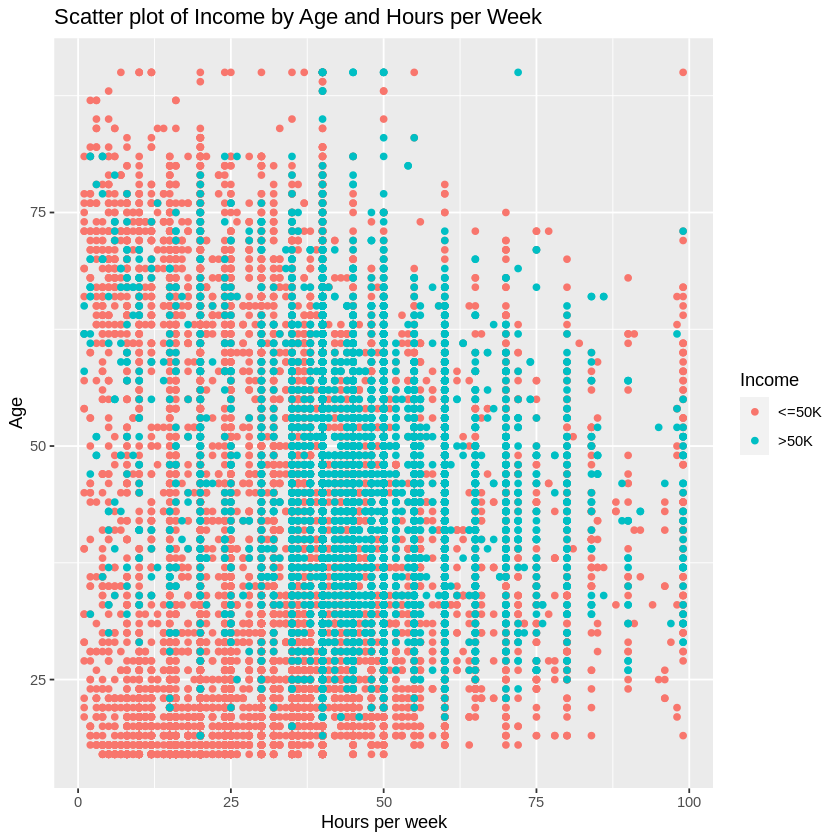

[1] "Plot 2: Histogram of Distribution of Age by Income Level"


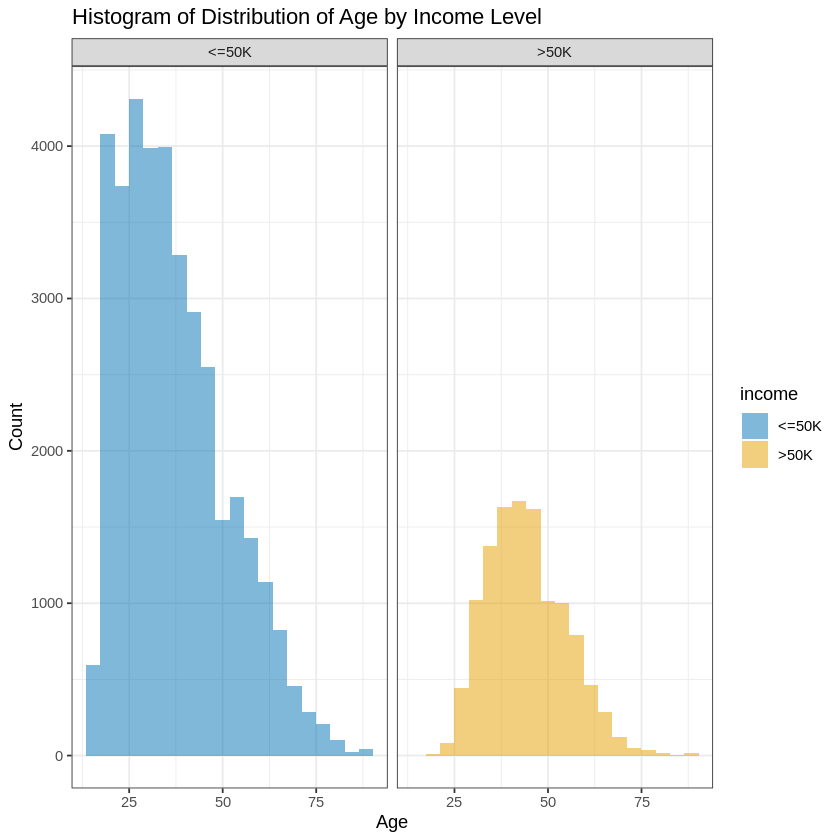

[1] "Plot 3: Boxplot Distribution of Age by Income Class"


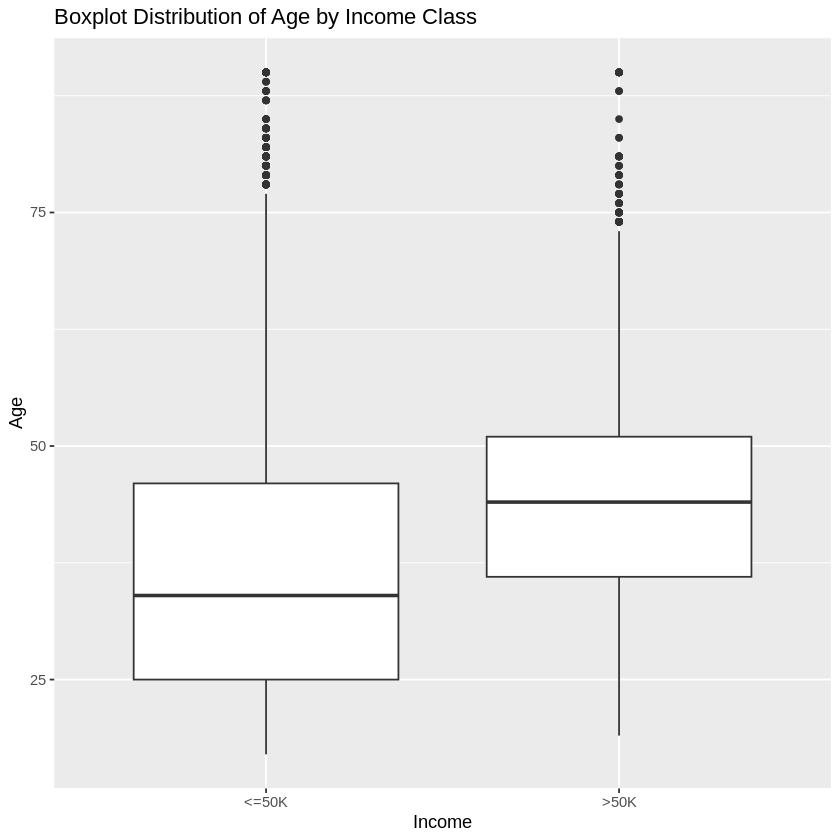

[1] "Plot 4: Boxplot Distribution of Final Weight by Income Class"


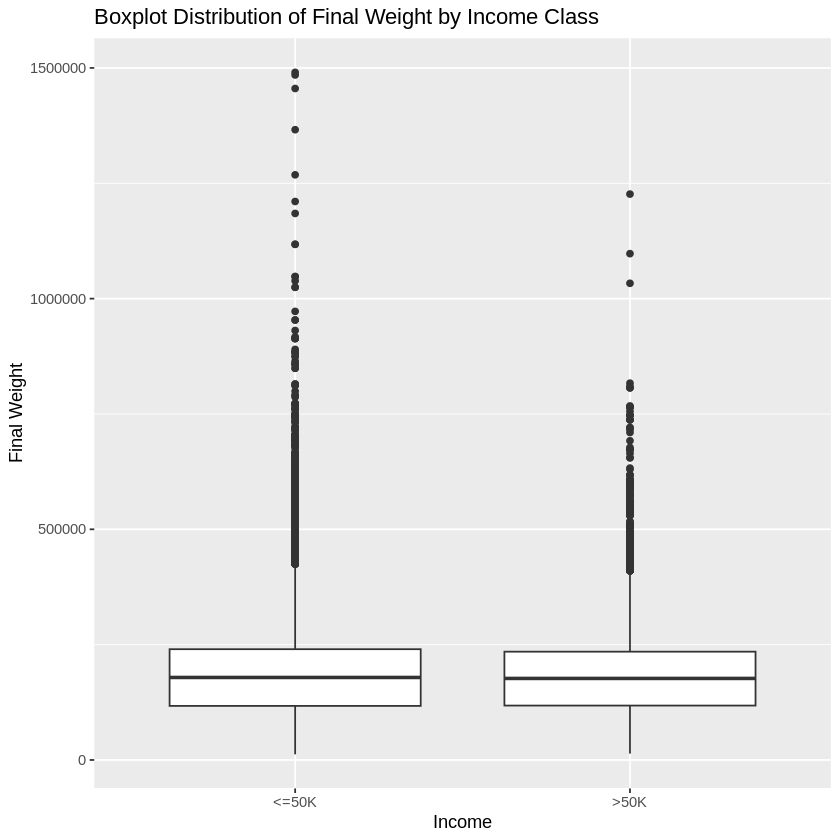

[1] "Plot 5: Boxplot Distribution of Education by Income Class"


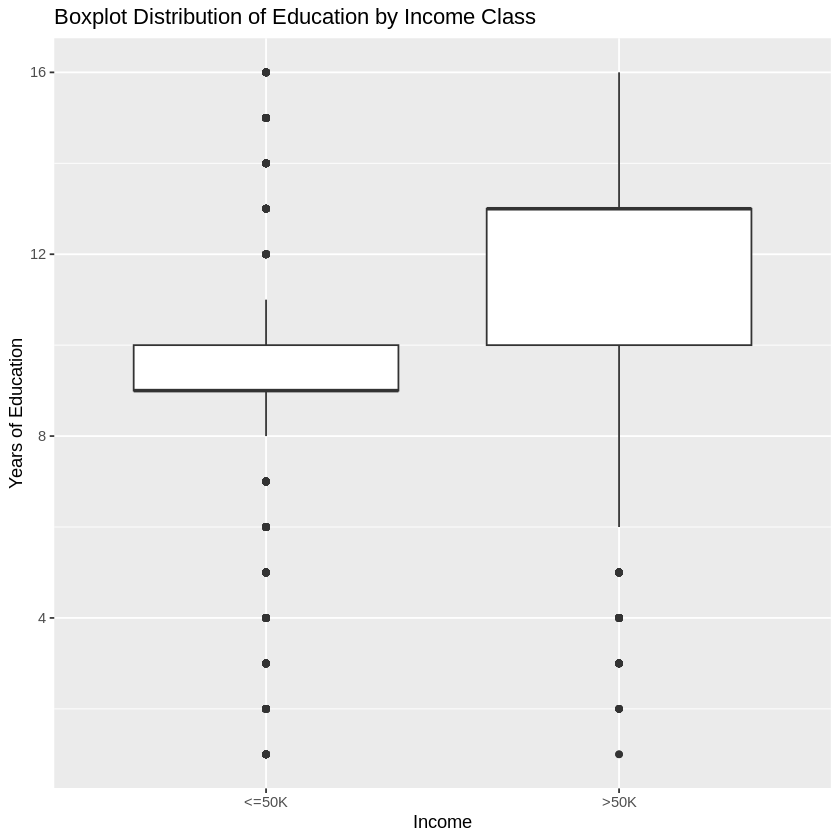

[1] "Plot 6: Relationship between Hours per Week and Education by Income Class"


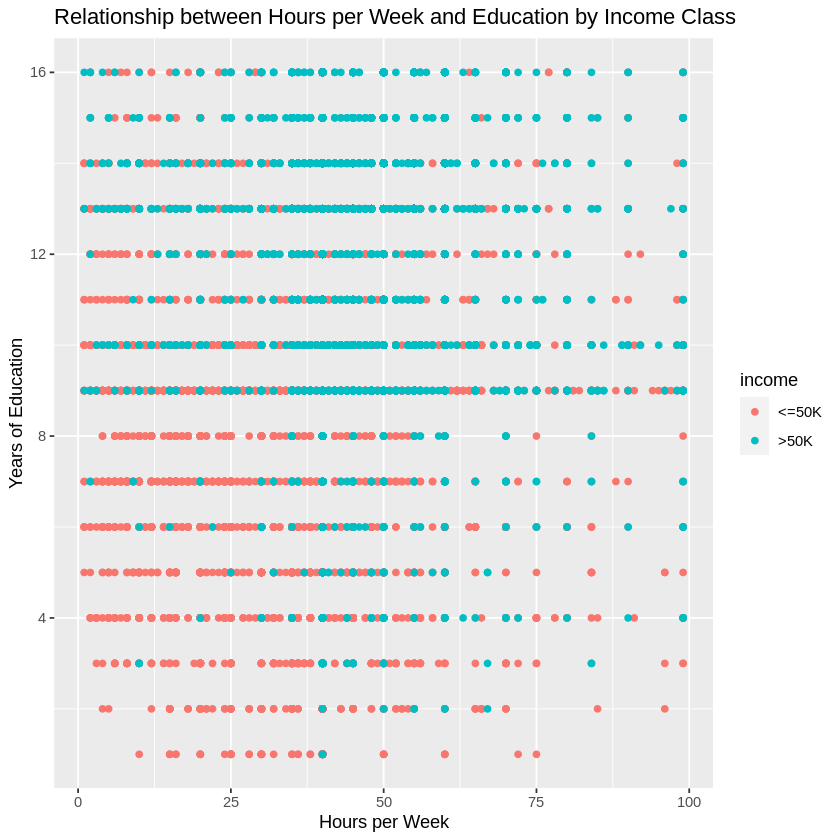

In [ ]:
# Creating necessary plots for confirmation of the observations:


# Scatter plot of hours per week vs. age by income:

print("Plot 1: Scatter plot of Income by Age and Hours per Week")

ggplot(adult_train, aes(x=hours_per_week, y=age, color=income)) +
  geom_point() +
  labs(x = "Hours per week", y = "Age", color = "Income") +
  ggtitle("Scatter plot of Income by Age and Hours per Week")



# Histogram of age by income:

ggplot(adult_train, aes(x=age, fill=income)) +
  geom_histogram(alpha=0.5, position="identity", bins=20) +
  scale_fill_manual(values = c("#0072B2", "#E69F00")) +
  facet_wrap(~income, ncol=2) +
  xlab("Age") +
  ylab("Count") +
  ggtitle("Histogram of Distribution of Age by Income Level") +
  theme_bw()

print("Plot 2: Histogram of Distribution of Age by Income Level")


# Distribution of Age by Income Class

ggplot(adult_train, aes(x = income, y = age)) +
  geom_boxplot() +
  labs(x = "Income", y = "Age") +
  ggtitle("Boxplot Distribution of Age by Income Class")

print("Plot 3: Boxplot Distribution of Age by Income Class")


# Distribution of Final Weight by Income Class

ggplot(adult_train, aes(x = income, y = fnlwgt)) +
  geom_boxplot() +
  labs(x = "Income", y = "Final Weight") +
  ggtitle("Boxplot Distribution of Final Weight by Income Class")

print("Plot 4: Boxplot Distribution of Final Weight by Income Class")


# Distribution of Education by Income Class

ggplot(adult_train, aes(x = income, y = education_num)) +
  geom_boxplot() +
  labs(x = "Income", y = "Years of Education") +
  ggtitle("Boxplot Distribution of Education by Income Class")

print("Plot 5: Boxplot Distribution of Education by Income Class")



# Relationship between Hours per Week and Education by Income Class

ggplot(adult_train, aes(x = hours_per_week, y = education_num, color = income)) +
  geom_point() +
  labs(x = "Hours per Week", y = "Years of Education") +
  ggtitle("Relationship between Hours per Week and Education by Income Class")

print("Plot 6: Relationship between Hours per Week and Education by Income Class")






## **Observations from plots:**

From the above graphs, we can observe some interesting patterns that shed light on the factors associated with income categories:

- Plot 1 reveals that age and hours worked do not have a straightforward relationship with income. Instead, there is a sweet spot where individuals in a certain age range and working hours tend to earn more than 50k.

- Plot 2 depicts that there is a distinct difference in the distribution of records between the above 50k and below 50k categories, with regards to different age groups.

- Plot 3 depicts again that the distribution of age in the below 50k class is averagely lower compared to the above 50k class.

- Plot 4 depicts the distribution of final weight variable among the income classes, and we can see that it is pretty much the same in both the income classes, confirming its redundancy for classification.

- Plot 5 shows that the education-num is averagely lower in the below 50k category.

- Plot 6 again shows how higher years of education and higher hours per week mean above 50k category.

All these observations confirm that our hypothesis of ignoring the final weight variable and using other variables for our model holds true.

### Chosing the Predictor Variables:


After looking at our observations we can see that that `fnlwgt` can be ignored since the mean median is pretty much the same across both the classes and the distribution is equal so it won't help in classification. From the table we can see capital_gain and capital_loss have a major impact on determining the class.
So ultimately `education_num` `hours_per_week` `capital_gain` `capital_loss` are the predictor variables that will help us determine the income category

## V fold cross validation and model training:

In [ ]:
# V fold cross validation to choose the best k value for our model engine

set.seed(1234)
adult_vfold <- vfold_cv(adult_train, v = 10, strata = income)

adult_recipe <- recipe(income ~ age + education_num + hours_per_week + capital_gain + capital_loss, data = adult_train) |>
    step_scale(all_predictors()) |>
    step_center(all_predictors())

knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
  set_engine("kknn") |>
  set_mode("classification")





In [ ]:
k_vals <- tibble(neighbors = seq(from = 1, to = 20, by = 1))

knn_results <- workflow() |>
  add_recipe(adult_recipe) |>
  add_model(knn_spec) |>
  tune_grid(resamples = adult_vfold, grid = k_vals) |>
  collect_metrics()

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,binary,0.8283612,10,0.0017683483,Preprocessor1_Model01
2,accuracy,binary,0.8280951,10,0.0017727177,Preprocessor1_Model02
20,accuracy,binary,0.8259247,10,0.0014222448,Preprocessor1_Model20
19,accuracy,binary,0.8257200,10,0.0015604558,Preprocessor1_Model19
16,accuracy,binary,0.8254538,10,0.0010152170,Preprocessor1_Model16
18,accuracy,binary,0.8254334,10,0.0012628127,Preprocessor1_Model18
15,accuracy,binary,0.8251877,10,0.0011388313,Preprocessor1_Model15
8,accuracy,binary,0.8251058,10,0.0009992957,Preprocessor1_Model08
17,accuracy,binary,0.8249829,10,0.0013627101,Preprocessor1_Model17


[1] "Plot 7: Distribution of k values against their respective accuracies"


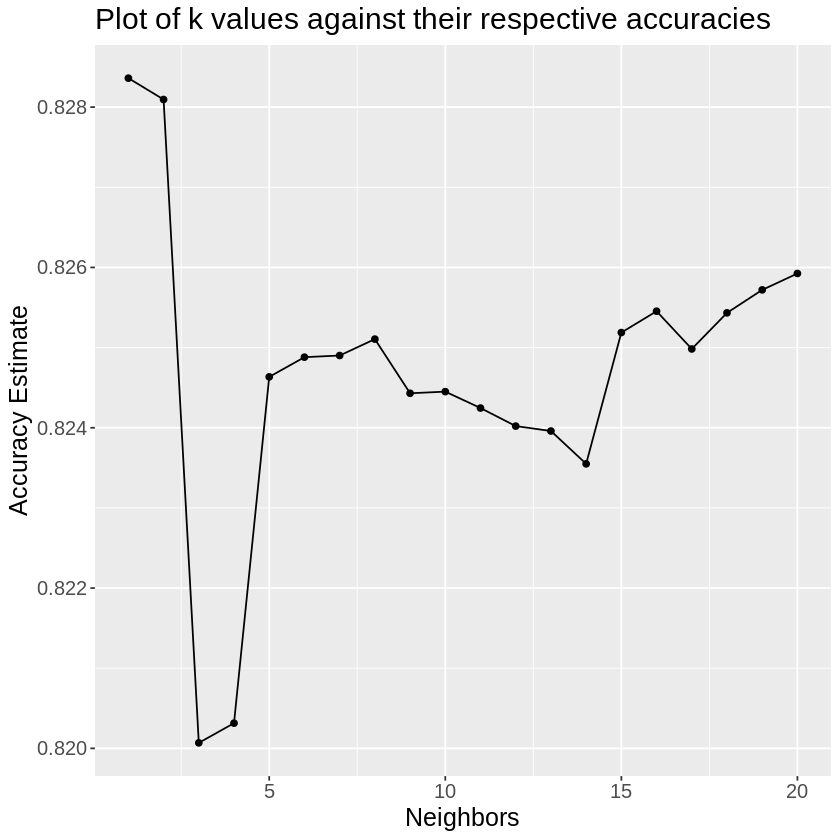

In [ ]:
# we check the most opitmal accuracy by plotting the metrics for the k values

accuracies <- knn_results |>
  filter(.metric == "accuracy") |>
  arrange(-mean)
accuracies

# Plot of k values against their respective accuracies
cross_val_plot <- accuracies |> 
    ggplot(aes(x = neighbors, y = mean)) +
    geom_point() +
    geom_line() +
    labs(x = "Neighbors", y = "Accuracy Estimate") +
    theme(text = element_text(size = 15)) +
    ggtitle("Plot of k values against their respective accuracies")
  
print("Plot 7: Distribution of k values against their respective accuracies")
  
cross_val_plot

### **Selecting ideal K value:**

From the graph (Plot 7) we can see that k = 1 has the highest accuracy estimate, but we chose k = 8 so that we don't overfit our model since k also has almost same accuracy. Moreover, we didn't consider k = 20 because it would underfit the model as the accuracy continues increasing after that point.

In [ ]:
# create a k-nearest neighbors classification model with k = 8 for the adult_train dataset
adult_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 8) |>  
  set_engine("kknn") |>  
  set_mode("classification")  

# create a workflow to combine the recipe and the model
adult_fit <- workflow() |>  
    add_recipe(adult_recipe) |> 
    add_model(adult_spec) |>  
    fit(data = adult_train)  


## **Model testing:**

In [ ]:
# predict income using the fitted model on the adult_test dataset and bind the predicted values to the original dataset
income_prediction <- predict(adult_fit, adult_test) |> 
    bind_cols(adult_test)

# calculate the classification accuracy of the model on the test set using the metrics function from the yardstick package
adult_acc <- income_prediction |>
    metrics(truth = income, estimate = .pred_class) |> 
    select(.metric, .estimate) |> 
    head(1)

# create a confusion matrix to evaluate the model's performance on the test set
adult_matrix <- income_prediction |> 
    conf_mat(truth = income, estimate = .pred_class)


In [ ]:
adult_acc
adult_matrix

.metric,.estimate
<chr>,<dbl>
accuracy,0.8248987


          Truth
Prediction <=50K  >50K
     <=50K 11919  2372
     >50K    479  1512

In [ ]:
# add a new column to the income_prediction dataset with the predicted income class
income_prediction <- income_prediction |> 
    mutate(income_pred = .pred_class)

# display the first few rows of the income_prediction dataset with the predicted income class column
head(income_prediction)


.pred_class,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,income,income_pred
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>
<=50K,38,215646,9,0,0,40,<=50K,<=50K
<=50K,53,234721,7,0,0,40,<=50K,<=50K
<=50K,37,280464,10,0,0,80,>50K,<=50K
<=50K,38,28887,7,0,0,50,<=50K,<=50K
<=50K,40,193524,16,0,0,60,>50K,<=50K
<=50K,56,216851,13,0,0,40,>50K,<=50K


## **Final Visualizations:**


[1] "Plot 8: Comparison of Scatter plots of hours per week vs. age by income and predicted income:"


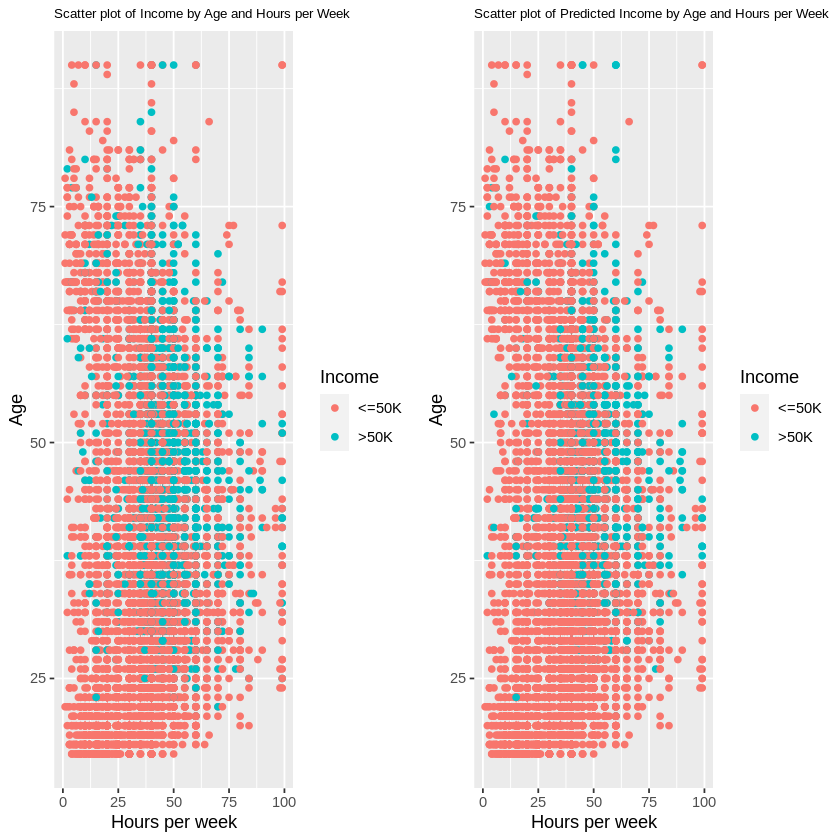

[1] "Plot 9: Comparison of Histograms of age by income and predicted income:"


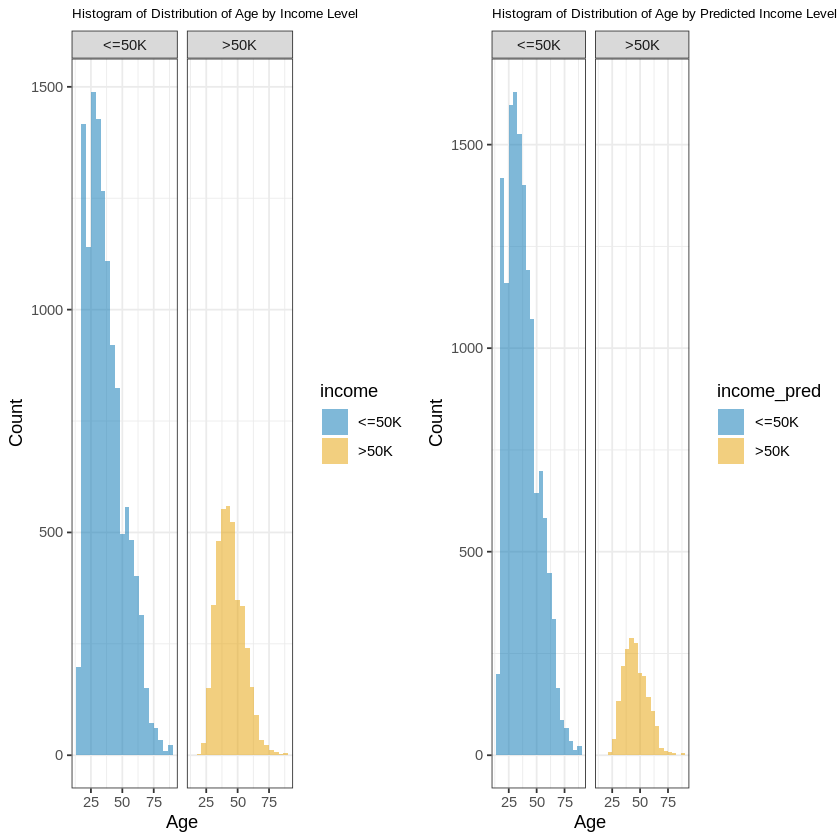

[1] "Plot 10: Comparison of Distributions of Age by Income and Predicted Income Class"


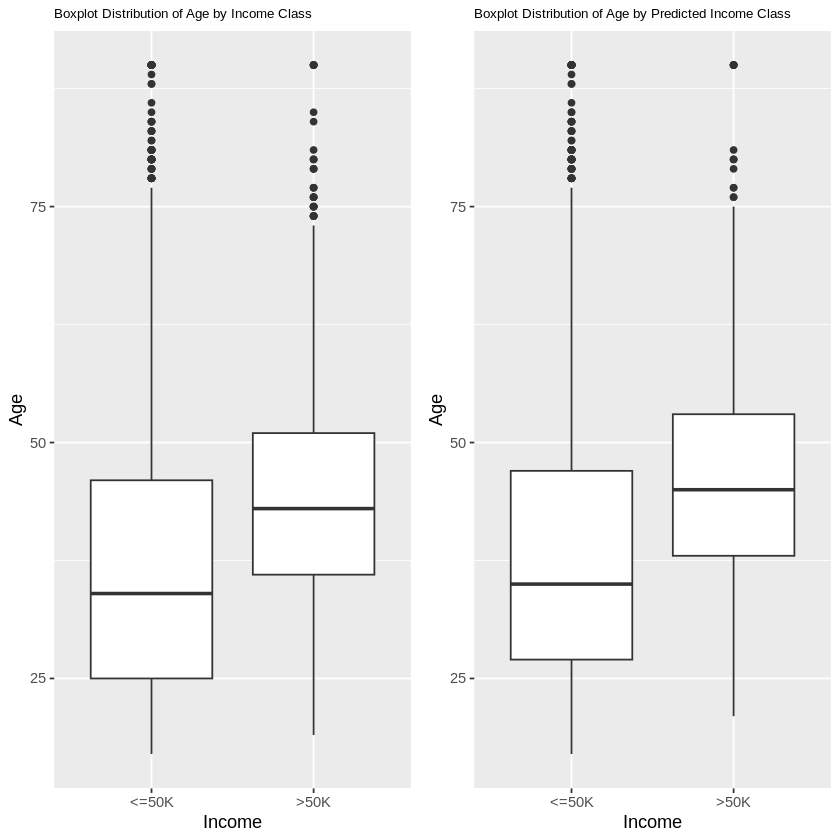

[1] "Plot 11: Comparsion of Distributions of Final Weight by Income and Predicted Income Class"


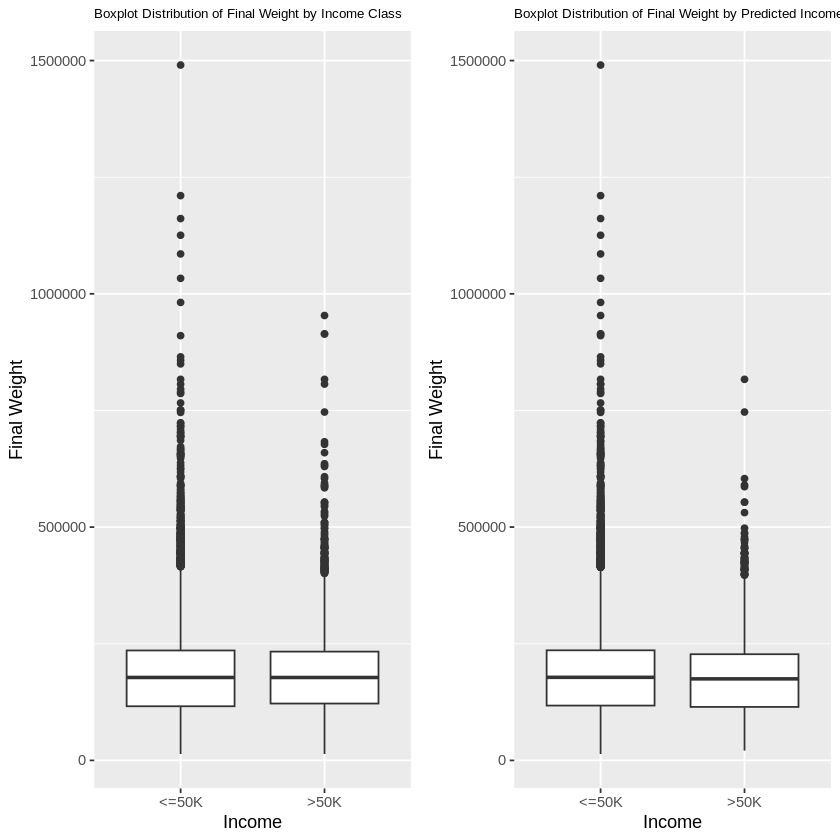

[1] "Plot 12: Comparison of Distributions of Education by Income and Predicted Income Class"


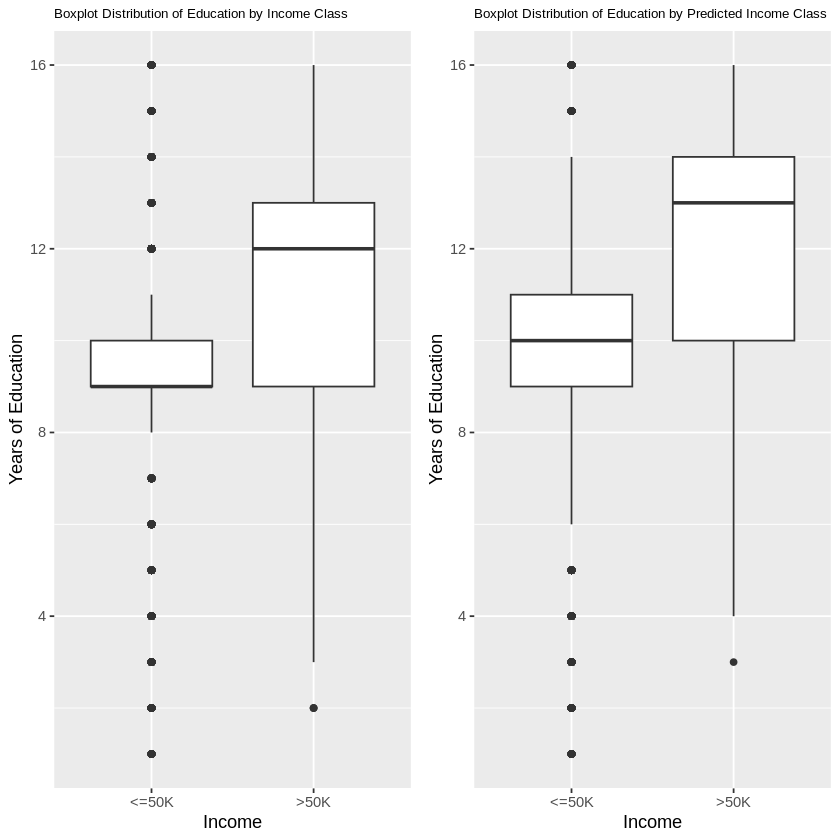

[1] "Plot 13: Comparison of the Relationships between Hours per Week and Education by Income and Predicted Income Class"


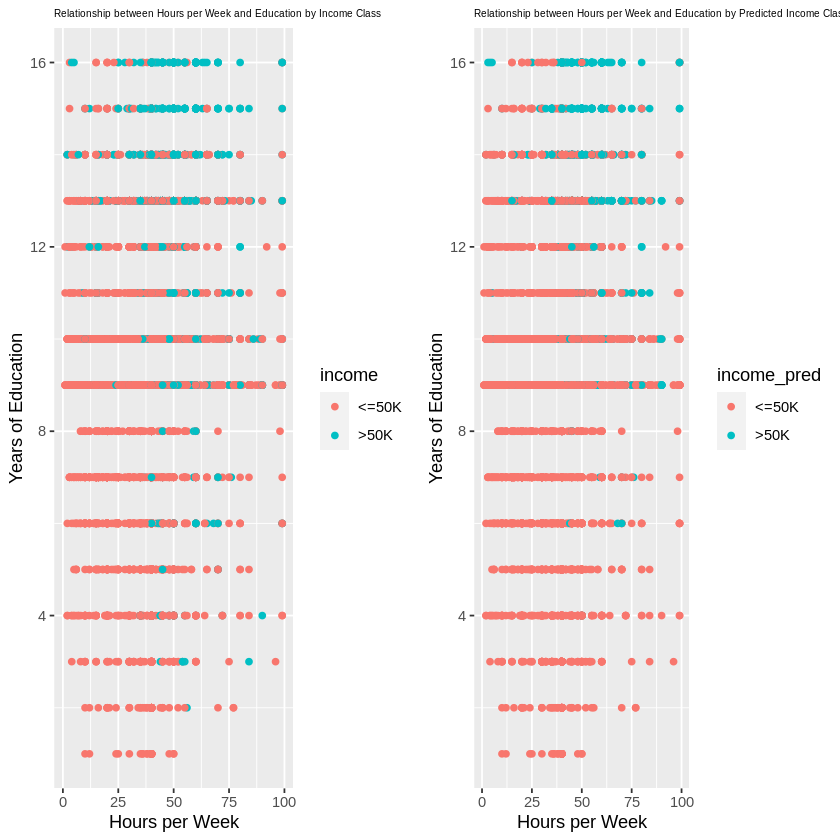

In [ ]:
# Creating necessary plots for confirmation of the hypothesis:

# Comparison of Scatter plots of hours per week vs. age by income and predicted income:

# Scatter plot of hours per week vs. age by income:
a1 <- ggplot(income_prediction, aes(x=hours_per_week, y=age, color=income)) +
  geom_point() +
  labs(x = "Hours per week", y = "Age", color = "Income") +
  ggtitle("Scatter plot of Income by Age and Hours per Week") +
  theme(plot.title = element_text(size = 8))

# Scatter plot of hours per week vs. age by predicted income:
a2 <- ggplot(income_prediction, aes(x=hours_per_week, y=age, color=income_pred)) +
  geom_point() +
  labs(x = "Hours per week", y = "Age", color = "Income") +
  ggtitle("Scatter plot of Predicted Income by Age and Hours per Week") +
  theme(plot.title = element_text(size = 8))

# arrange the two scatter plots side by side
grid.arrange(a1, a2, ncol = 2)

print("Plot 8: Comparison of Scatter plots of hours per week vs. age by income and predicted income:")

# Comparison of Histograms of age by income and predicted income:

# Histogram of age by income:
b1 <- ggplot(income_prediction, aes(x=age, fill=income)) +
  geom_histogram(alpha=0.5, position="identity", bins=20) +
  scale_fill_manual(values = c("#0072B2", "#E69F00")) +
  facet_wrap(~income, ncol=2) +
  xlab("Age") +
  ylab("Count") +
  ggtitle("Histogram of Distribution of Age by Income Level") +
  theme_bw() +
  theme(plot.title = element_text(size = 8))

# Histogram of age by predicted income:
b2 <- ggplot(income_prediction, aes(x=age, fill=income_pred)) +
  geom_histogram(alpha=0.5, position="identity", bins=20) +
  scale_fill_manual(values = c("#0072B2", "#E69F00")) +
  facet_wrap(~income_pred, ncol=2) +
  xlab("Age") +
  ylab("Count") +
  ggtitle("Histogram of Distribution of Age by Predicted Income Level") +
  theme_bw() +
  theme(plot.title = element_text(size = 8))

# arrange the two histograms side by side
grid.arrange(b1, b2, ncol = 2)

print("Plot 9: Comparison of Histograms of age by income and predicted income:")

# Comparison of Distributions of Age by Income and Predicted Income Class

# Boxplot Distribution of Age by Income Class
c1 <- ggplot(income_prediction, aes(x = income, y = age)) +
  geom_boxplot() +
  labs(x = "Income", y = "Age") +
  ggtitle("Boxplot Distribution of Age by Income Class") +
  theme(plot.title = element_text(size = 8))

# Boxplot Distribution of Age by Predicted Income Class
c2 <- ggplot(income_prediction, aes(x = income_pred, y = age)) +
  geom_boxplot() +
  labs(x = "Income", y = "Age") +
  ggtitle("Boxplot Distribution of Age by Predicted Income Class") +
  theme(plot.title = element_text(size = 8))


# arrange the two boxplots side by side
grid.arrange(c1, c2, ncol = 2)

print("Plot 10: Comparison of Distributions of Age by Income and Predicted Income Class")


# Comparsion of Distributions of Final Weight by Income and Predicted Income Class

# Boxplot Distribution of fnlwgt by Income Class
d1 <- ggplot(income_prediction, aes(x = income, y = fnlwgt)) +
  geom_boxplot() +
  labs(x = "Income", y = "Final Weight") +
  ggtitle("Boxplot Distribution of Final Weight by Income Class") +
  theme(plot.title = element_text(size = 8))

# Boxplot Distribution of fnlwgt by Predicted Income Class
d2 <- ggplot(income_prediction, aes(x = income_pred, y = fnlwgt)) +
  geom_boxplot() +
  labs(x = "Income", y = "Final Weight") +
  ggtitle("Boxplot Distribution of Final Weight by Predicted Income Class") +
  theme(plot.title = element_text(size = 8))

# arrange the two boxplots side by side
grid.arrange(d1, d2, ncol = 2)

print("Plot 11: Comparsion of Distributions of Final Weight by Income and Predicted Income Class")


# Comparison of Distributions of Education by Income and Predicted Income Class

# Boxplot Distribution of education_num by Income Class
e1 <- ggplot(income_prediction, aes(x = income, y = education_num)) +
  geom_boxplot() +
  labs(x = "Income", y = "Years of Education") +
  ggtitle("Boxplot Distribution of Education by Income Class") +
  theme(plot.title = element_text(size = 8))

# Boxplot Distribution of education_num by Predicted Income Class
e2 <- ggplot(income_prediction, aes(x = income_pred, y = education_num)) +
  geom_boxplot() +
  labs(x = "Income", y = "Years of Education") +
  ggtitle("Boxplot Distribution of Education by Predicted Income Class") +
  theme(plot.title = element_text(size = 8))

# arrange the two boxplots side by side
grid.arrange(e1, e2, ncol = 2)

print("Plot 12: Comparison of Distributions of Education by Income and Predicted Income Class")



# Comparison of the Relationships between Hours per Week and Education by Income and Predicted Income Class

# Relationship between Hours per Week and Education by Income Class
f1 <- ggplot(income_prediction, aes(x = hours_per_week, y = education_num, color = income)) +
  geom_point() +
  labs(x = "Hours per Week", y = "Years of Education") +
  ggtitle("Relationship between Hours per Week and Education by Income Class") +
  theme(plot.title = element_text(size = 6))

# Relationship between Hours per Week and Education by Predicted Income Class
f2 <- ggplot(income_prediction, aes(x = hours_per_week, y = education_num, color = income_pred)) +
  geom_point() +
  labs(x = "Hours per Week", y = "Years of Education") +
  ggtitle("Relationship between Hours per Week and Education by Predicted Income Class") +
  theme(plot.title = element_text(size = 6))

# arrange the two scatterplots side by side
grid.arrange(f1, f2, ncol = 2)

print("Plot 13: Comparison of the Relationships between Hours per Week and Education by Income and Predicted Income Class")






---
<h1 style="font-family: TimesNewRoman;">Methods & Results:</h1>

## Methods:

- First, we downloaded the dataset from the UCI Machine Learning Repository and loaded it into a tibble using R. We then cleaned the dataset by removing any unnecessary columns and converted the remaining columns into usable data types.

- After cleaning the data, we split it into training and testing sets. The training data was used to train the model, while the testing data was used to evaluate its accuracy.

- We then specified the class variable in the training dataset as a factor to perform classification. This allowed the model to learn how to classify new instances based on the class levels in the training data.

- To analyze the training data, we created summary tables and graphs. This helped us to identify any patterns or trends in the data and understand which factors were important for classification.

- We then used the parsnip R package to build a model using the K-Nearest Neighbor Classifier method to make predictions on new instances. This method predicts the class of a new instance based on the similarity to other instances in the training data.

- Next, we performed K-Fold Cross Validation to determine the optimal number of nearest neighbors to use in the model. This involved splitting the training data into multiple subsets and using each subset as a validation set to test the accuracy of the model.

- Once we determined the optimal number of nearest neighbors, we trained the final model using the entire training dataset.

- We then tested the final model on the testing dataset and evaluated its accuracy using the metrics() function. This function calculated the percentage of correctly classified instances, which helped us to understand the performance of the model.

- Finally, we used a confusion matrix to confirm our hypothesis about the key factors in predicting the classes. The confusion matrix showed the number of true positives, false positives, true negatives, and false negatives for each class, which helped us to understand the performance of the model for each class.

---

## Results:


Based on our classification model, we achieved an accuracy of 82.4% and confirmed our initial hypothesis about the key factors that affect a person's income category, including education level, age, work hours, capital gains and losses. 

Our analysis revealed that the capital_gain variable is a powerful predictor of income category, as we observed a clear association between positive capital_gain values and higher income levels. This variable continued to have a strong impact on the classification outcome even after scaling, suggesting its importance in our model. However, it's important to note that relying solely on this variable may not generalize well to datasets that are noisier or less well-structured.

Therefore, a combination of factors should be taken into consideration in future analyses, and it may be beneficial to explore other variables or feature engineering techniques to further improve the accuracy of our classification model.

---

# Discussion:

**Summary:**


Our analysis revealed that certain variables have a significant impact on income category, including years of education, age, hours per week and capital gains and losses. Individuals with advanced degrees were more likely to belong to the >50k income category, while middle-aged individuals were also more likely to fall into this category. On the other hand, young and elderly individuals were more likely to be in the <=50k income category. Moreover, people in the higher income category worked for more hours and had high capital gains and losses.

Our findings provide valuable insights into the associations between different variables and income categories, which can inform future investigations and interventions aimed at addressing income inequality.

**What do we expect to find?**

We expected to find that certain variables, such as age, years of education and capital gain will have a significant effect. Specifically, we anticipated that individuals with high capital gains and more years of education will be more likely to be more well off.

**What impact could such findings have?**

These findings could have significant implications for policymakers and organizations focused on addressing income inequality. By identifying the factors that contribute to income disparities, we can develop more targeted interventions and policies aimed at reducing these disparities. For example, our findings may highlight the need for increased investment in education and training programs to provide individuals with the skills and qualifications needed to access higher-paying jobs. Additionally, our findings may underscore the importance of diversity, equity, and inclusion initiatives to address biases related to age and years of education.

**What future questions could this lead to?**

Our findings may lead to several future questions related to the underlying factors contributing to income disparities. For example, we may want to explore why more years of education doesn't necessarily mean getting paid more. We also missed the oppurtunity to evaluate how country of origin and sex effects the income category, since we were not able to include these variables with our current Knn algorithim. Finally, our findings may raise questions about the broader societal factors contributing to income inequality, such as access to healthcare, affordable housing, and social services, and how these factors can be addressed to promote greater economic opportunity for all individuals.

---

# **References:**

Morgan, J., &amp; David, M. (1963). Education and income. The Quarterly Journal of Economics, 77(3), 423. https://doi.org/10.2307/1879570.  
Investing in education has significant economic benefits, as it increases earning potential and leads to greater productivity in the workforce. To evaluate the economic value of education, it's important to focus on the benefits that can be measured, such as increased earning potential. While annual earnings can reflect productivity, they can also be affected by unemployment and leisure time.

Center for Machine Learning and Intelligent Systems. (n.d.). UCI Machine Learning Repository. Retrieved April 15, 2023, from https://archive.ics.uci.edu/ml/datasets/Adult 

Spurk, D., Abele, A.E. Who Earns More and Why? A Multiple Mediation Model from Personality to Salary. J Bus Psychol 26, 87–103 (2011). https://doi.org/10.1007/s10869-010-9184-3. 
Career success and higher earnings are influenced not only by factors such as education, socio-economic background, and external labor market conditions but also by individual differences. These differences can be categorized into stable variables like personality and malleable variables like expectations and goals.
